<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

# Table of Contents
1. [Importing Packages](#section1)</br>
2. [About dataset](#section2)</br>
3. [Load Data From CSV File](#section3)</br>
4. [Data visualization and pre-processing](#section4)</br>
    - 4.1. [Feature selection/extraction](#section41)</br>
    - 4.2. [Converting Categorical features to numerical values](#section42)</br>
    - 4.3. [One Hot Encoding](#section43)</br>
5. [Feature selection](#section5)</br>
6. [Normalize Data](#section6)</br>
7. [Classification](#section7)</br>
    - 7.1. [Train and Test data split](#section71)</br>
    - 7.2. [Model building](#section72)</br>
        - 7.2.1. [K Nearest Neighbor(KNN)](#section721)</br>
        - 7.2.2. [Decision Tree](#section722)</br>
        - 7.2.3. [Support Vector Machines](#section723)</br>
        - 7.2.4. [Logistic Regression](#section724)</br>
8. [Model Evaluation using Test set](#section8)</br>
    - 8.1. [Download and load the test set](#section81)</br>
    - 8.2. [Loading Test set for evaluation](#section82)</br>
    - 8.3. [Preprocess test dataset to extract features equivalent to training set features for making the predictions and to find out accuracies](#section83)</br>
    - 8.4. [Applying models on test set and checking accuracies](#section84)</br>
        - 8.4.1. [K Nearest Neighbor(KNN)](#section841)</br>
            - 8.4.1.1. [Jaccard Index](#section8411)</br>
            - 8.4.1.2. [F1 Score](#section8412)</br>
        - 8.4.2. [Decision Tree](#section842)</br>
            - 8.4.2.1. [Jaccard Index](#section8421)</br>
            - 8.4.2.2. [F1 Score](#section8422)</br>
        - 8.4.3. [Support Vector Machines](#section843)</br>
            - 8.4.3.1. [Jaccard Index](#section8431)</br>
            - 8.4.3.2. [F1 Score](#section8432)</br>
        - 8.4.4. [Logistic Regression](#section844)</br>
            - 8.4.4.1. [Jaccard Index](#section8441)</br>
            - 8.4.4.2. [F1 Score](#section8442)</br>
            - 8.4.4.3. [Log Loss](#section8443)</br>
9. [Accuracy report & the best classifier](#section9)</br>

In this notebook we try to compare different classification models to get the best classifier to predict if loan paid-off or not using the historical dataset from previous loan applications. 

First we'll load this dataset using Pandas library, then we'll clean the data for building models. Then we'll apply the following algorithms:

- k-Nearest Neighbour
- Decision Tree
- Support Vector Machine
- Logistic Regression

Then we'll find the best one for this specific dataset by the following accuracy evaluation methods:

- Jaccard index
- F1-score
- Log Loss

The results is reported as the accuracy of each classifier. Lets first load required libraries:

<a id=section1></a>
## 1. Importing Packages

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)
%matplotlib inline

<a id=section2></a>
## 2. About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-01 11:55:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-05-01 11:55:19 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



<a id=section3></a>
## 3. Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


<a id='section4'></a>
## 4. Data visualization and pre-processing

Let’s see how many of each class is in our data set 

In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [7]:
# notice: installing seaborn might takes a few minutes
# !conda install -c anaconda seaborn -y

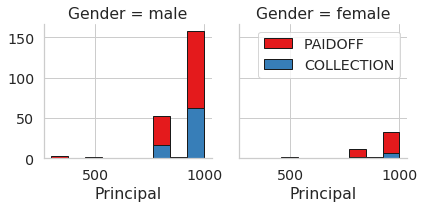

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

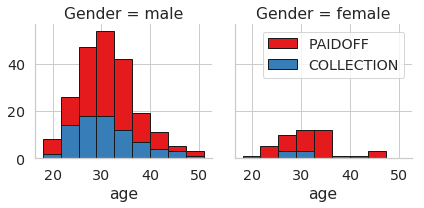

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

<a id=section41></a>
### 4.1. Feature selection/extraction

### Lets look at the day of the week people get the loan 

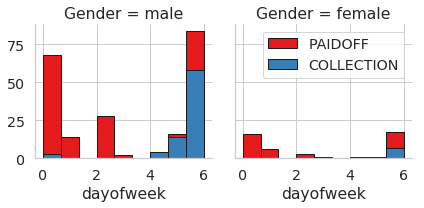

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


<a id=section42></a>
### 4.2. Converting Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


<a id=section43></a>
### 4.3. One Hot Encoding  
#### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


Lets calculate the number of days remaining for the due date to pay the loan.

In [16]:
df['due_time'] = (df['due_date']-df['effective_date'])
df['due_time'] = (df['due_time']/np.timedelta64(1,'D')).astype('int')

#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [17]:
Feature = df[['Principal','terms','age','Gender','weekend','due_time']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,due_time,Bechalor,High School or Below,college
0,1000,30,45,0,0,29,0,1,0
1,1000,30,33,1,0,29,1,0,0
2,1000,15,27,0,0,14,0,0,1
3,1000,30,28,1,1,29,0,0,1
4,1000,30,29,0,1,29,0,0,1


<a id=section5></a>
### 5. Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,due_time,Bechalor,High School or Below,college
0,1000,30,45,0,0,29,0,1,0
1,1000,30,33,1,0,29,1,0,0
2,1000,15,27,0,0,14,0,0,1
3,1000,30,28,1,1,29,0,0,1
4,1000,30,29,0,1,29,0,0,1


What are our lables?

In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

<a id=section6></a>
### 6. Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [20]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
         0.53257725, -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         0.53257725,  2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.88417105, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
         0.53257725, -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
         0.53257725, -0.38170062, -0.87997669,  1.14984679]])

<a id=section7></a>
### 7. Classification 

Now, we use the training set to build an accurate model. Then use the test set to report the accuracy of the model
As mentioned in the beginning of this notebook, we'll use the following algorithms:

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

<a id=section71></a>
### 7.1. Train and Test data split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 9) (276,)
Test set: (70, 9) (70,)


<a id=section72></a>
### 7.2. Model building:

<a id=section721></a>
#### 7.2.1. K Nearest Neighbor(KNN)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    #Train Model and Predict  
    model = KNeighborsClassifier(n_neighbors = n, n_jobs=-1, weights='uniform').fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)    
    std_acc[n-1] = np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

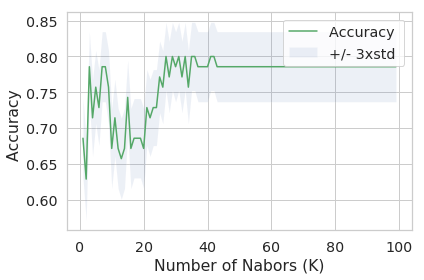

In [25]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [26]:
print( "The best accuracy is", mean_acc.max(), "when k=", mean_acc.argmax()+1) 

The best accuracy is 0.8 when k= 27


In [27]:
final_KNN = KNeighborsClassifier(n_neighbors = 50).fit(X_train,y_train)

<a id=section722></a>
#### 7.2.2. Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    #Train Model and Predict  
    decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    y_decision_pred = decision_tree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_decision_pred)    
    std_acc[n-1] = np.std(y_decision_pred == y_test)/np.sqrt(y_decision_pred.shape[0])
mean_acc

array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.78571429,
       0.78571429, 0.65714286, 0.71428571, 0.72857143, 0.7       ,
       0.7       , 0.7       , 0.68571429, 0.67142857, 0.67142857,
       0.68571429, 0.68571429, 0.68571429, 0.68571429, 0.68571429,
       0.67142857, 0.68571429, 0.67142857, 0.7       , 0.7       ,
       0.7       , 0.68571429, 0.68571429, 0.68571429, 0.68571429,
       0.68571429, 0.68571429, 0.67142857, 0.68571429, 0.68571429,
       0.68571429, 0.68571429, 0.68571429, 0.7       , 0.7       ,
       0.67142857, 0.68571429, 0.68571429, 0.67142857, 0.68571429,
       0.67142857, 0.68571429, 0.68571429, 0.68571429, 0.7       ,
       0.67142857, 0.7       , 0.67142857, 0.68571429, 0.68571429,
       0.68571429, 0.67142857, 0.67142857, 0.68571429, 0.7       ,
       0.7       , 0.68571429, 0.68571429, 0.68571429, 0.68571429,
       0.7       , 0.7       , 0.67142857, 0.68571429, 0.68571429,
       0.7       , 0.7       , 0.67142857, 0.67142857, 0.7    

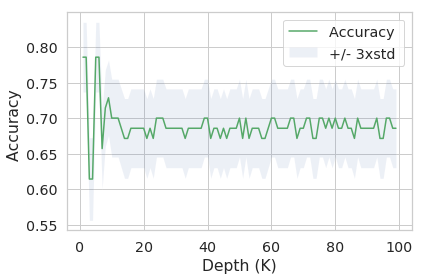

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Depth (K)')
plt.tight_layout()
plt.show()

In [31]:
print("Max depth after 15 intuitively seems stable, but not so lower accuracy")

Max depth after 15 intuitively seems stable, but not so lower accuracy


In [32]:
final_decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 15).fit(X_train,y_train)

<a id=section723></a>
#### 7.2.3. Support Vector Machine

In [33]:
from sklearn import svm

In [34]:
final_SVM = svm.SVC(kernel='linear')
final_SVM.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [35]:
metrics.accuracy_score(final_SVM.predict(X_test), y_test)

0.7714285714285715

<a id=section724></a>
#### 7.2.4. Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
# lRegression = LogisticRegression(C=0.03, solver='liblinear', max_iter=300).fit(X_train,y_train)

In [38]:
# metrics.accuracy_score(lRegression.predict(X_test), y_test)

In [39]:
Ks = 1000
lr_mean_acc = np.zeros((Ks-1))
lr_std_acc = np.zeros((Ks-1))
ConfustionMx = [];
i = 1
for n in np.arange(0.001,1,0.001 ): 
    model = LogisticRegression(C = n, solver = 'liblinear', max_iter=200).fit(X_train,y_train)
    y_pred = model.predict(X_test)
    lr_mean_acc[i-1] = metrics.accuracy_score(y_test, y_pred)    
    lr_std_acc[i-1] = np.std(y_pred == y_test)/np.sqrt(y_pred.shape[0])
    i = i +1

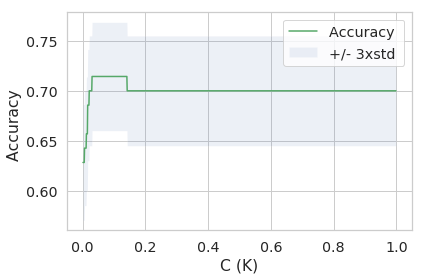

In [40]:
plt.plot(np.arange(0.001,1,0.001),lr_mean_acc,'g')
plt.fill_between(np.arange(0.001,1,0.001),lr_mean_acc - 1 * lr_std_acc,lr_mean_acc + 1 * lr_std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('C (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy is seemingly", lr_mean_acc.max(), "when C is between 0.06 to 0.19(approx.)") 
mean_acc

The best accuracy is seemingly 0.7142857142857143 when C is between 0.06 to 0.19(approx.)


array([0.78571429, 0.78571429, 0.61428571, 0.61428571, 0.78571429,
       0.78571429, 0.65714286, 0.71428571, 0.72857143, 0.7       ,
       0.7       , 0.7       , 0.68571429, 0.67142857, 0.67142857,
       0.68571429, 0.68571429, 0.68571429, 0.68571429, 0.68571429,
       0.67142857, 0.68571429, 0.67142857, 0.7       , 0.7       ,
       0.7       , 0.68571429, 0.68571429, 0.68571429, 0.68571429,
       0.68571429, 0.68571429, 0.67142857, 0.68571429, 0.68571429,
       0.68571429, 0.68571429, 0.68571429, 0.7       , 0.7       ,
       0.67142857, 0.68571429, 0.68571429, 0.67142857, 0.68571429,
       0.67142857, 0.68571429, 0.68571429, 0.68571429, 0.7       ,
       0.67142857, 0.7       , 0.67142857, 0.68571429, 0.68571429,
       0.68571429, 0.67142857, 0.67142857, 0.68571429, 0.7       ,
       0.7       , 0.68571429, 0.68571429, 0.68571429, 0.68571429,
       0.7       , 0.7       , 0.67142857, 0.68571429, 0.68571429,
       0.7       , 0.7       , 0.67142857, 0.67142857, 0.7    

In [42]:
final_lRegression = LogisticRegression(C=0.1, solver='liblinear', max_iter=200).fit(X_train,y_train)

<a id=section8></a>
### 8. Model Evaluation using Test set

In [43]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

<a id=section81></a>
### 8.1. Download and load the test set:

In [44]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-05-01 11:55:35--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-01 11:55:35 (441 MB/s) - ‘loan_test.csv’ saved [3642/3642]



<a id=section82></a>
### 8.2. Loading Test set for evaluation 

In [45]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


<a id=section83></a>
### 8.3. Preprocess test dataset to extract features equivalent to training set features for making the predictions and to find out accuracies.

In [46]:
y_true = df['loan_status'].values
test_df['due_date'] = pd.to_datetime(df['due_date'])
test_df['effective_date'] = pd.to_datetime(df['effective_date'])
test_df['dayofweek'] = df['effective_date'].dt.dayofweek
test_df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_df['due_time'] = (test_df['due_date']-test_df['effective_date'])
test_df['due_time'] = (test_df['due_time']/np.timedelta64(1,'D')).astype('int')
Feature = df[['Principal','terms','age','Gender','weekend','due_time']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
X_true = Feature
X_true = preprocessing.StandardScaler().fit(X_true).transform(X_true)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


<a id=section84></a>
### 8.4. Applying models on test set and checking accuracies.

<a id=section841></a>
### 8.4.1. KNN

In [47]:
y_pred = final_KNN.predict(X_true)

<a id=section8411></a>
#### 8.4.1.1 Jaccard Index

In [48]:
jaccard_knn = jaccard_similarity_score(y_pred, y_true)
jaccard_knn

0.7543352601156069

<a id=section8412></a>
#### 8.4.1.2. F1- Score

In [49]:
f1score_knn = f1_score(y_pred, y_true, average='weighted')
f1score_knn

0.8570864570103521

<a id=section842></a>
### 8.4.2. Decision Tree

In [50]:
y_pred = final_decision_tree.predict(X_true)

<a id=section8421></a>
#### 8.4.2.1. Jaccard Index

In [51]:
jaccard_decision_tree = jaccard_similarity_score(y_pred, y_true)
jaccard_decision_tree

0.8815028901734104

<a id=section8422></a>
#### 8.4.2.2. F1 Score

In [52]:
f1score_decision_tree = f1_score(y_pred, y_true, average='weighted')
f1score_decision_tree

0.8792219222633426

<a id=section843></a>
### 8.4.3. SVM

In [53]:
y_pred = final_SVM.predict(X_true)

<a id=section8431></a>
#### 8.4.3.1. Jaccard Index

In [54]:
jaccard_svm = jaccard_similarity_score(y_pred, y_true)
jaccard_svm

0.7572254335260116

<a id=section8432></a>
#### 8.4.3.2. F1 Score

In [55]:
f1score_svm = f1_score(y_pred, y_true, average='weighted')
f1score_svm

0.8378447841098653

<a id=section844></a>
### 8.4.4. Logistic Regression

In [56]:
y_pred = final_lRegression.predict(X_true)

<a id=section8441></a>
#### 8.4.4.1. Jaccard Index

In [57]:
jaccard_logistic_regression = jaccard_similarity_score(y_pred, y_true)
jaccard_logistic_regression

0.7543352601156069

<a id=section8442></a>
#### 8.4.4.2. F1 Score

In [58]:
f1score_logistic_regression = f1_score(y_pred, y_true, average='weighted')
f1score_logistic_regression

0.7779696070907413

<a id=section8443></a>
#### 8.4.4.3. Log Loss

In [59]:
np.place(y_pred, y_pred=='PAIDOFF', 1)
np.place(y_pred, y_pred=='COLLECTION', 0)
np.place(y_true, y_true=='PAIDOFF', 1)
np.place(y_true, y_true=='COLLECTION', 0)

In [60]:
y_pred = y_pred.astype(np.float)
y_true = y_true.astype(np.float)

In [61]:
logloss_logistic_regression = log_loss(y_pred, y_true)
logloss_logistic_regression

8.485017293361743

<a id=section9></a>
## 9. Accuracy report & the best classifier
The accuracy of the built models using different evaluation metrics:

In [62]:
Jaccard = [jaccard_knn, jaccard_decision_tree, jaccard_svm, jaccard_logistic_regression]
F1_score = [f1score_knn, f1score_decision_tree, f1score_svm, f1score_logistic_regression]
LogLoss = ['NA','NA','NA',logloss_logistic_regression]
    
result_dict = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'Logistic Regression'], 'Jaccard Index': Jaccard, 'F1-score': F1_score, 'Log Loss': LogLoss}

Report_table = pd.DataFrame(data=result_dict, columns=['Algorithm', 'Jaccard Index', 'F1-score', 'Log Loss'], index=None)
Report_table

,Algorithm,Jaccard Index,F1-score,Log Loss
0,KNN,0.754335,0.857086,NA
1,Decistion Tree,0.881503,0.879222,NA
2,SVM,0.757225,0.837845,NA
3,Logistic Regression,0.754335,0.777970,8.48502


#### From this we can say that, Decision Tree is the best classifer with accuracy of about 88% in classifying the Paid-off and collection labels for this dataset in both Jaccard Index and F1 Score.